In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Mac, Windows 사용자 맞게 설정)
import platform
if platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows
    plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 데이터 불러오기
df = pd.read_csv('Location1.csv')

# 데이터 정보 확인
print(df.info())

# 데이터 상위 5개 샘플 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB
None


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2017-01-02 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       43800 non-null  float64
 1   relativehumidity_2m  43800 non-null  int64  
 2   dewpoint_2m          43800 non-null  float64
 3   windspeed_10m        43800 non-null  float64
 4   windspeed_100m       43800 non-null  float64
 5   winddirection_10m    43800 non-null  int64  
 6   winddirection_100m   43800 non-null  int64  
 7   windgusts_10m        43800 non-null  float64
 8   target               43800 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.3 MB
None


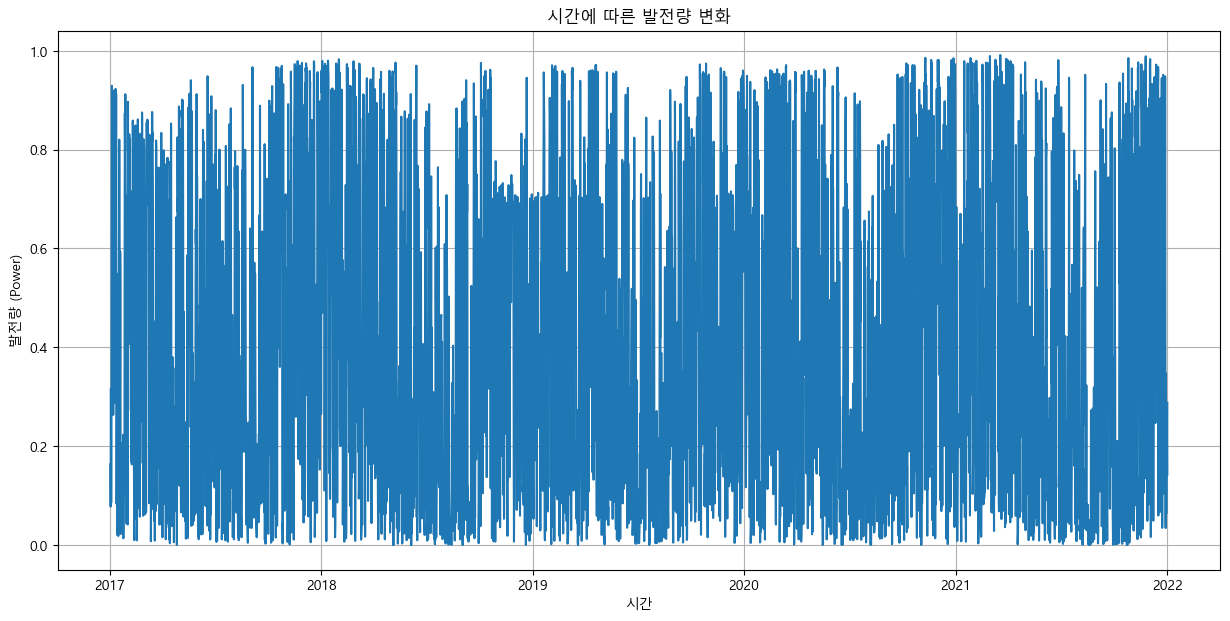

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,target
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [6]:
# 'Time' 컬럼을 datetime 형식으로 변환
df['Time'] = pd.to_datetime(df['Time'])

# 'Time' 컬럼을 인덱스로 설정
df.set_index('Time', inplace=True)

# 'Power' 컬럼 이름을 'target'으로 변경
df.rename(columns={'Power': 'target'}, inplace=True)

# 데이터프레임 정보 다시 확인
print(df.info())

# 'target' (발전량) 시계열 그래프
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['target'])
plt.title('시간에 따른 발전량 변화')
plt.xlabel('시간')
plt.ylabel('발전량 (Power)')
plt.grid(True)
plt.show()

df.head()

--- 'target'과의 상관관계 계수 ---
target                 1.000000
windspeed_100m         0.778704
windspeed_10m          0.732801
windgusts_10m          0.662677
winddirection_100m     0.171619
winddirection_10m      0.157623
relativehumidity_2m   -0.070360
temperature_2m        -0.207101
dewpoint_2m           -0.223739
Name: target, dtype: float64


히트맵 이미지를 생성합니다...


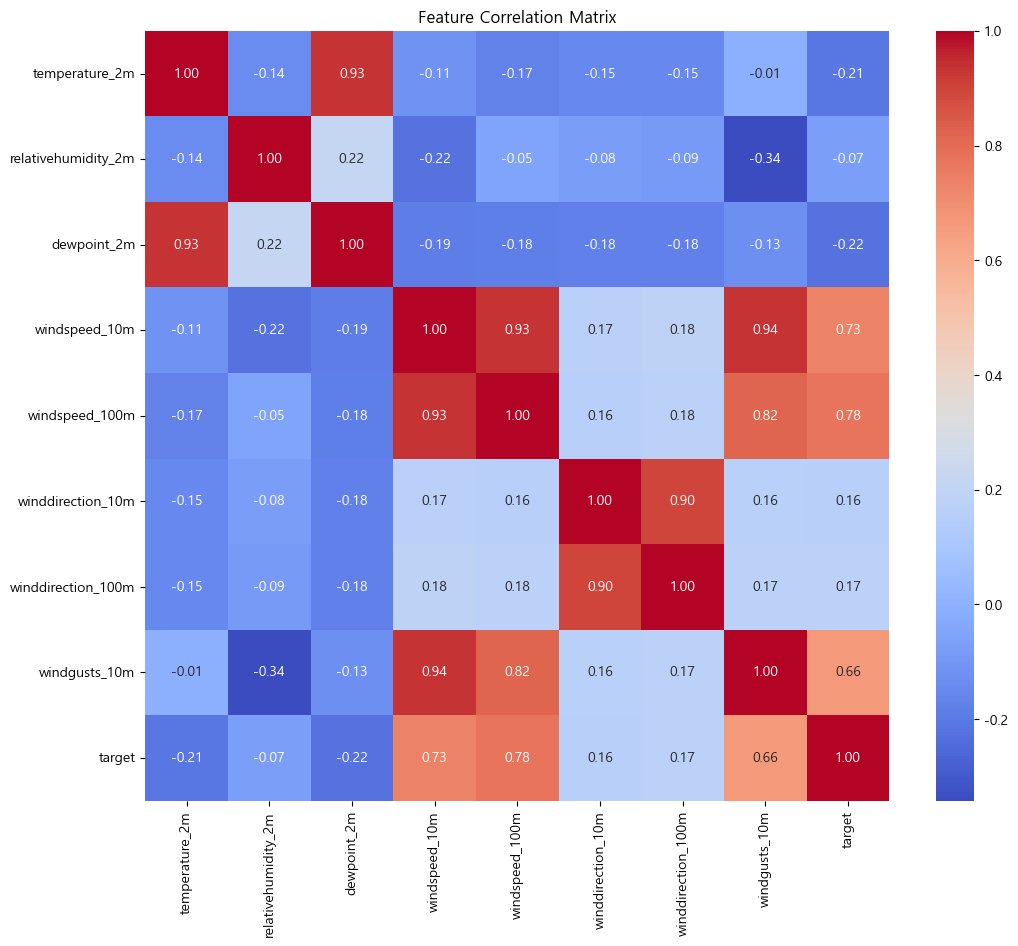

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 원본 데이터프레임(df)에서 상관관계 행렬을 다시 계산합니다.
original_df = pd.read_csv('Location1.csv')
original_df.rename(columns={'Power': 'target'}, inplace=True)

# 날짜 열이 있다면 datetime 형식으로 변환
if 'Date' in original_df.columns:
    original_df['Date'] = pd.to_datetime(original_df['Date'])

# 숫자형 열들만 선택하여 상관관계 계산
numeric_df = original_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# 'target' 컬럼과의 상관관계를 계산하고 내림차순으로 정렬하여 출력합니다.
print("--- 'target'과의 상관관계 계수 ---")
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlations)
print("\n" + "="*40 + "\n")

# 히트맵을 다시 시각화합니다.
print("히트맵 이미지를 생성합니다...")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# target을 제외한 feature 컬럼들 선택
features = [col for col in df.columns if col != 'target']

# 스케일러 초기화
scaler = StandardScaler()

# 중요: Train 데이터의 feature에만 fit & transform 수행
train_df = train_df.copy()  # 복사본 생성
train_df[features] = scaler.fit_transform(train_df[features])

# Val, Test 데이터에는 transform만 수행
val_df = val_df.copy()     # 복사본 생성
val_df[features] = scaler.transform(val_df[features])

test_df = test_df.copy()   # 복사본 생성
test_df[features] = scaler.transform(test_df[features])

# 스케일링 결과 확인 (Train 데이터 상위 5개)
print("--- 스케일링 후 Train 데이터 ---")
print(train_df.head())

# 스케일링 결과 확인 (Validation 데이터 상위 5개)
print("\n--- 스케일링 후 Validation 데이터 ---")
print(val_df.head())

--- 스케일링 후 Train 데이터 ---
                     temperature_2m  relativehumidity_2m  dewpoint_2m  \
Time                                                                    
2017-01-02 00:00:00       -0.919244             0.757421    -0.667715   
2017-01-02 01:00:00       -0.924367             0.816643    -0.657193   
2017-01-02 02:00:00       -1.006343             1.112749    -0.667715   
2017-01-02 03:00:00       -0.975602             0.935085    -0.678237   
2017-01-02 04:00:00       -0.980726             0.935085    -0.688759   

                     windspeed_10m  windspeed_100m  winddirection_10m  \
Time                                                                    
2017-01-02 00:00:00      -1.311702       -1.880974          -0.566672   
2017-01-02 01:00:00      -0.939601       -0.869135          -0.515424   
2017-01-02 02:00:00      -1.395725       -1.317606          -0.546173   
2017-01-02 03:00:00      -1.395725       -1.350963          -1.468645   
2017-01-02 04:00:00      

In [12]:
import numpy as np

def create_sequences(input_data, sequence_length, prediction_horizon):
    """
    시계열 데이터를 입력(X)과 출력(y) 시퀀스로 변환하는 함수
    """
    X, y = [], []
    data_len = len(input_data)
    for i in range(data_len - sequence_length - prediction_horizon + 1):
        # 입력 시퀀스: i 부터 i+sequence_length 까지의 데이터
        sequence = input_data[i:(i + sequence_length)]
        # 정답(라벨): i+sequence_length 에서 prediction_horizon 만큼 뒤의 'target' 값
        label_position = i + sequence_length + prediction_horizon - 1
        label = input_data.iloc[label_position]['target']
        
        X.append(sequence[features].values) # target을 제외한 feature들만 입력으로 사용
        y.append(label)
        
    return np.array(X), np.array(y)

# 시퀀스 길이와 예측 시점 정의
SEQUENCE_LENGTH = 24 * 7 # 7일 (168시간)의 데이터를 입력으로 사용
PREDICTION_HORIZON = 1   # 1시간 뒤의 발전량을 예측

# 각 데이터셋을 시퀀스 형태로 변환
X_train, y_train = create_sequences(train_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_val, y_val = create_sequences(val_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)
X_test, y_test = create_sequences(test_df, SEQUENCE_LENGTH, PREDICTION_HORIZON)

# 변환된 데이터의 형태(shape) 확인
print("--- 시퀀스 데이터 형태 ---")
print(f"X_train shape: {X_train.shape}") # (샘플 수, 시퀀스 길이, feature 수)
print(f"y_train shape: {y_train.shape}")   # (샘플 수,)
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

--- 시퀀스 데이터 형태 ---
X_train shape: (30491, 168, 8)
y_train shape: (30491,)
X_val shape: (6403, 168, 8)
y_val shape: (6403,)
X_test shape: (6402, 168, 8)
y_test shape: (6402,)


In [13]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 1. NumPy 배열을 PyTorch Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 2. TensorDataset 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# 3. DataLoader 생성
BATCH_SIZE = 64 # 한 번에 처리할 데이터 묶음의 크기

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# DataLoader가 준비되었는지 확인
print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"Train DataLoader: {len(train_loader)} batches")
print(f"Validation DataLoader: {len(val_loader)} batches")
print(f"Test DataLoader: {len(test_loader)} batches")
print("\nPyTorch DataLoader 준비 완료!")

BATCH_SIZE: 64
Train DataLoader: 477 batches
Validation DataLoader: 101 batches
Test DataLoader: 101 batches

PyTorch DataLoader 준비 완료!


In [17]:
# --- 모델 하이퍼파라미터 정의 ---
INPUT_SIZE = X_train.shape[2]  # 입력의 feature 개수 (8개)
HIDDEN_SIZE = 256            # LSTM의 은닉 상태(hidden state) 크기
NUM_LAYERS = 3                # 쌓아 올릴 LSTM 레이어 개수
OUTPUT_SIZE = 1                # 출력 값의 개수 (1시간 뒤 발전량)
LEARNING_RATE = 0.001          # 학습률

# --- 디바이스 설정 (GPU or CPU) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# --- LSTM 모델 정의 ---
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM 레이어
        # batch_first=True : 입력 텐서의 차원을 (batch_size, sequence_length, input_size)로 설정
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        
        # Dropout 레이어 (과적합 방지)
        self.dropout = nn.Dropout(0.2)
        
        # Fully-Connected (Linear) 레이어
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # 초기 은닉 상태와 셀 상태를 0으로 초기화
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # LSTM 순전파
        out, _ = self.lstm(x, (h0, c0))
        
        # 마지막 타임스텝의 출력만 사용
        out = out[:, -1, :]
        
        # Dropout 적용
        out = self.dropout(out)
        
        # Linear 레이어를 통과시켜 최종 출력 생성
        out = self.fc(out)
        return out

# --- 모델, 손실 함수, 옵티마이저 초기화 ---
model = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 모델 구조 출력
print("\n--- Model Architecture ---")
print(model)

print("\n모델, 손실 함수, 옵티마이저 설정 완료!")

Using device: cuda

--- Model Architecture ---
LSTMModel(
  (lstm): LSTM(8, 256, num_layers=3, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)

모델, 손실 함수, 옵티마이저 설정 완료!


In [18]:
import time
from tqdm import tqdm # 학습 진행률을 시각적으로 보여주는 라이브러리

# --- 학습 하이퍼파라미터 ---
NUM_EPOCHS = 50 # 총 학습 횟수
PATIENCE = 7    # 조기 종료를 위한 대기 횟수

# --- 조기 종료 변수 초기화 ---
best_val_loss = float('inf')
early_stopping_counter = 0
best_model_path = 'best_model.pth'

print("--- 모델 학습 시작 ---")

start_time = time.time()

for epoch in range(NUM_EPOCHS):
    # --- Training Phase ---
    model.train()
    train_loss = 0.0
    
    # tqdm을 사용하여 학습 진행률 표시
    train_iterator = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]")
    
    for inputs, labels in train_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 옵티마이저 그래디언트 초기화
        optimizer.zero_grad()
        
        # 모델 예측
        outputs = model(inputs)
        
        # 손실 계산 (출력과 라벨의 차원 맞추기)
        loss = criterion(outputs.squeeze(), labels)
        
        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        # 진행률 바에 현재 loss 표시
        train_iterator.set_postfix({'loss': loss.item()})
        
    avg_train_loss = train_loss / len(train_loader)

    # --- Validation Phase ---
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad(): # 그래디언트 계산 비활성화
        val_iterator = tqdm(val_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Val]")
        for inputs, labels in val_iterator:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()
            val_iterator.set_postfix({'loss': loss.item()})

    avg_val_loss = val_loss / len(val_loader)
    
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")

    # --- Early Stopping Check ---
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), best_model_path) # 가장 좋은 모델 저장
        early_stopping_counter = 0
        print(f"Validation loss improved. Saving model to {best_model_path}")
    else:
        early_stopping_counter += 1
        print(f"Validation loss did not improve. Counter: {early_stopping_counter}/{PATIENCE}")

    if early_stopping_counter >= PATIENCE:
        print("Early stopping triggered.")
        break

end_time = time.time()
print(f"\n--- 학습 종료 ---")
print(f"총 학습 시간: {end_time - start_time:.2f}초")

# 가장 성능이 좋았던 모델의 가중치를 불러옵니다.
model.load_state_dict(torch.load(best_model_path))
print(f"최적 모델 '{best_model_path}' 로드 완료.")

--- 모델 학습 시작 ---


Epoch 1/50 [Val]: 100%|██████████| 101/101 [00:01<00:00, 73.23it/s, loss=0.00395]


Epoch 1/50 | Train Loss: 0.029314 | Val Loss: 0.027069
Validation loss improved. Saving model to best_model.pth


Epoch 2/50 [Val]: 100%|██████████| 101/101 [00:01<00:00, 76.53it/s, loss=0.00721]


Epoch 2/50 | Train Loss: 0.025482 | Val Loss: 0.027169
Validation loss did not improve. Counter: 1/7


Epoch 3/50 [Val]: 100%|██████████| 101/101 [00:02<00:00, 37.04it/s, loss=0.00109]


Epoch 3/50 | Train Loss: 0.024370 | Val Loss: 0.026328
Validation loss improved. Saving model to best_model.pth


Epoch 4/50 [Val]: 100%|██████████| 101/101 [00:03<00:00, 32.17it/s, loss=0.00625]


Epoch 4/50 | Train Loss: 0.023265 | Val Loss: 0.026459
Validation loss did not improve. Counter: 1/7


Epoch 5/50 [Val]: 100%|██████████| 101/101 [00:05<00:00, 17.20it/s, loss=0.00361]


Epoch 5/50 | Train Loss: 0.021826 | Val Loss: 0.027196
Validation loss did not improve. Counter: 2/7


Epoch 6/50 [Val]: 100%|██████████| 101/101 [00:01<00:00, 51.03it/s, loss=0.00542]


Epoch 6/50 | Train Loss: 0.019896 | Val Loss: 0.028709
Validation loss did not improve. Counter: 3/7


Epoch 7/50 [Val]: 100%|██████████| 101/101 [00:05<00:00, 18.82it/s, loss=0.0171]


Epoch 7/50 | Train Loss: 0.017872 | Val Loss: 0.031229
Validation loss did not improve. Counter: 4/7


Epoch 8/50 [Val]: 100%|██████████| 101/101 [00:03<00:00, 26.82it/s, loss=0.00608]


Epoch 8/50 | Train Loss: 0.014252 | Val Loss: 0.032120
Validation loss did not improve. Counter: 5/7


Epoch 9/50 [Val]: 100%|██████████| 101/101 [00:04<00:00, 22.68it/s, loss=0.0027]


Epoch 9/50 | Train Loss: 0.011109 | Val Loss: 0.032573
Validation loss did not improve. Counter: 6/7


Epoch 10/50 [Val]: 100%|██████████| 101/101 [00:04<00:00, 22.53it/s, loss=0.0153]

Epoch 10/50 | Train Loss: 0.008500 | Val Loss: 0.035650
Validation loss did not improve. Counter: 7/7
Early stopping triggered.

--- 학습 종료 ---
총 학습 시간: 343.38초
최적 모델 'best_model.pth' 로드 완료.


--- 테스트 데이터로 예측 시작 ---


[Test]: 100%|██████████| 101/101 [00:01<00:00, 61.77it/s]



--- 최종 성능 평가 결과 ---
MAE (Mean Absolute Error): 0.1164
RMSE (Root Mean Squared Error): 0.1484
R-squared (결정 계수): 0.7335


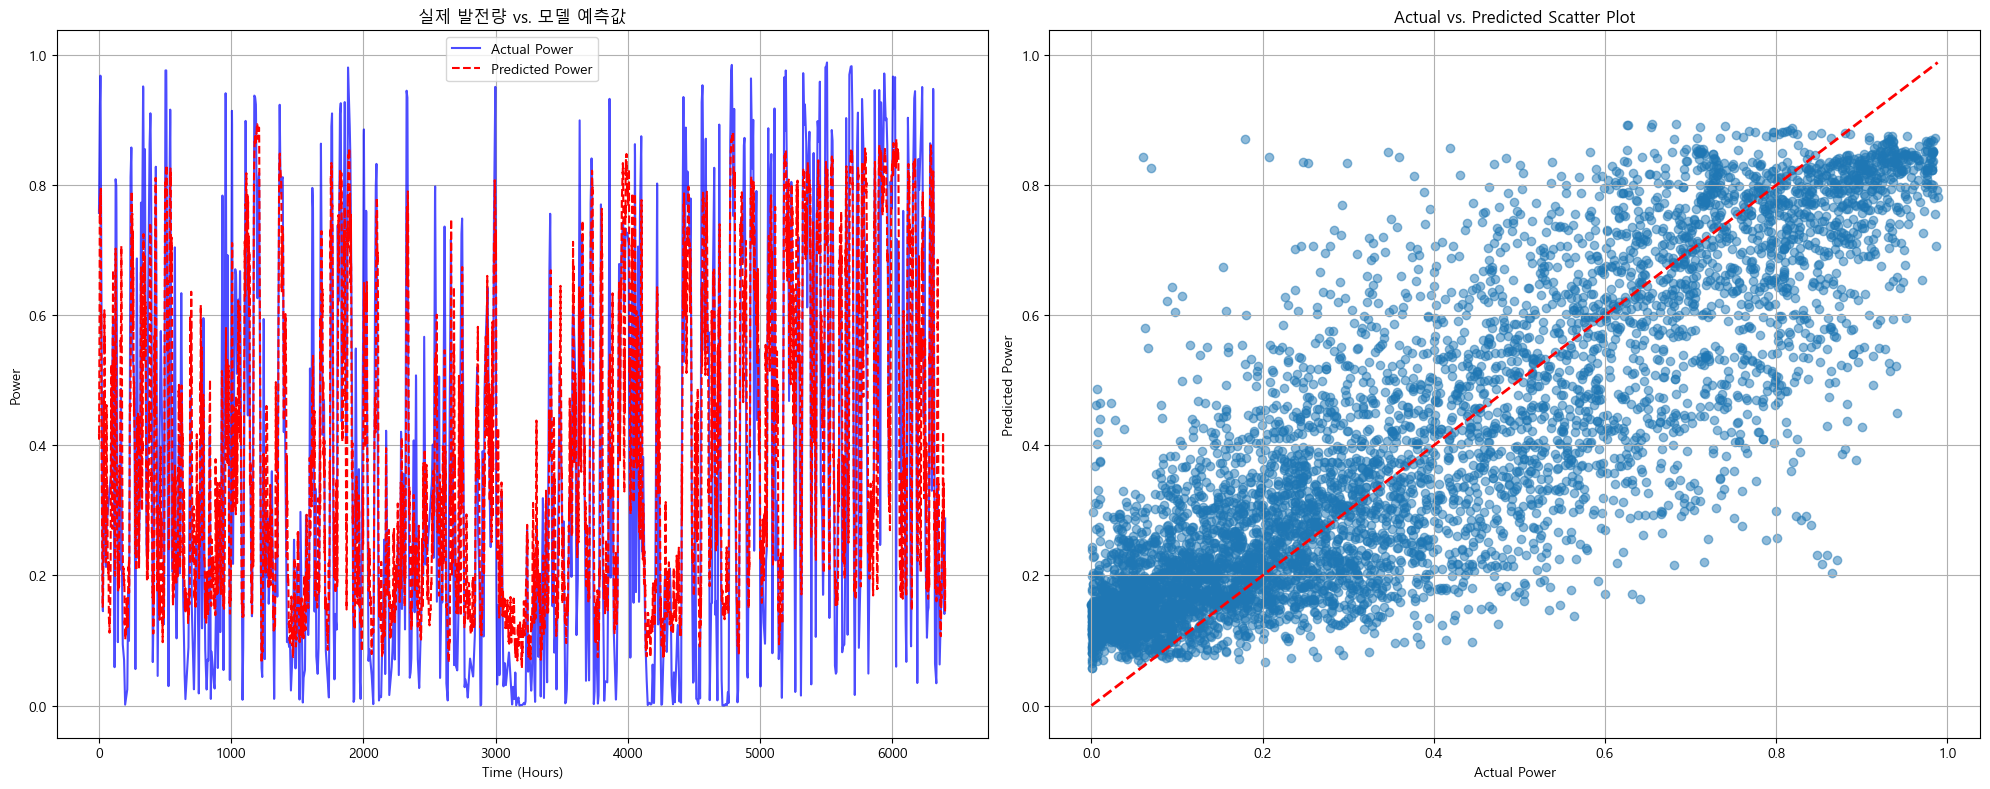

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 최종 평가 ---
model.eval()
all_predictions = []
all_actuals = []

print("--- 테스트 데이터로 예측 시작 ---")

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="[Test]"):
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        
        all_predictions.append(outputs.squeeze().cpu().numpy())
        all_actuals.append(labels.cpu().numpy())

# 리스트들을 하나의 numpy 배열로 결합
predictions = np.concatenate(all_predictions)
actuals = np.concatenate(all_actuals)

# --- 성능 지표 계산 ---
mae = mean_absolute_error(actuals, predictions)
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predictions)

print("\n--- 최종 성능 평가 결과 ---")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R-squared (결정 계수): {r2:.4f}")


# --- 결과 시각화 ---
plt.figure(figsize=(20, 8))

# 1. 시간에 따른 실제값 vs 예측값
plt.subplot(1, 2, 1)
plt.plot(actuals, label='Actual Power', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicted Power', color='red', linestyle='--')
plt.title('실제 발전량 vs. 모델 예측값')
plt.xlabel('Time (Hours)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)


# 2. 실제값 vs 예측값 산점도 (Scatter Plot)
plt.subplot(1, 2, 2)
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linestyle='--', lw=2) # y=x 기준선
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.grid(True)

plt.tight_layout()
plt.show()